# Support Vector Machines for Linear and non-Linear Classification Tasks

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Load and Explore the Dataset
Load the Breast Cancer dataset from sklearn and perform exploratory data analysis.

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0     0.0  
1     0.0  
2     0.0  
3     0.0  
4     0.0  
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000  

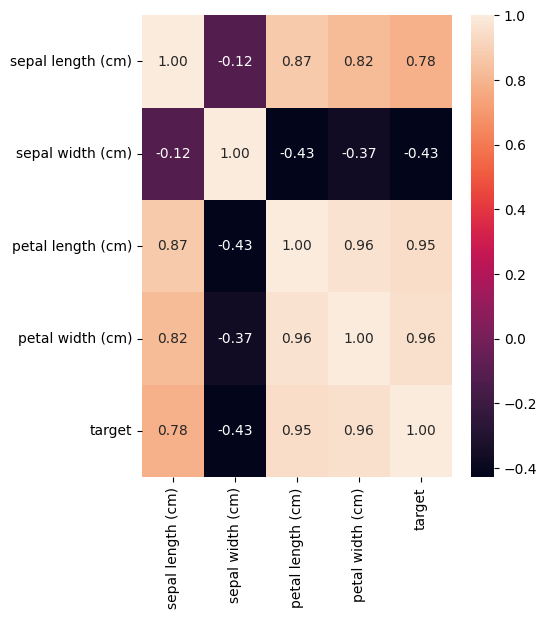

In [4]:
# Load the Iris dataset from sklearn
iris = datasets.load_iris()

# Convert the dataset to a Pandas DataFrame
df = pd.DataFrame(np.c_[iris['data'], iris['target']], columns=np.append(iris['feature_names'], ['target']))

# Display the first few rows of the DataFrame
print(df.head())

# Display the summary statistics of the DataFrame
print(df.describe())

# Display the distribution of the target variable
print(df['target'].value_counts())

# Plot the correlation matrix
plt.figure(figsize=(5, 6))
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.show()

# Preprocess the Data
Preprocess the data by handling missing values, encoding categorical variables, and splitting the data into training and testing sets.

In [5]:
# Preprocess the Data
# Check for missing values
print(df.isnull().sum())

# Since there are no missing values, we don't need to handle them.
# The dataset only contains numerical variables, so we don't need to encode any categorical variables.

# Split the data into features and target
X = df.drop('target', axis=1)
y = df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("Training set shape (X): ", X_train.shape)
print("Training set shape (y): ", y_train.shape)
print("Testing set shape (X): ", X_test.shape)
print("Testing set shape (y): ", y_test.shape)

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64
Training set shape (X):  (120, 4)
Training set shape (y):  (120,)
Testing set shape (X):  (30, 4)
Testing set shape (y):  (30,)


# Train the SVM with Different Kernels
Train the Support Vector Machine model with different kernel functions and parameter values for linearly separable and non-linearly separable classification tasks.

In [6]:
# Define the SVM models with different kernels
svm_linear = svm.SVC(kernel='linear')
svm_poly = svm.SVC(kernel='poly')
svm_rbf = svm.SVC(kernel='rbf')

# Train the SVM models
svm_linear.fit(X_train, y_train)
svm_poly.fit(X_train, y_train)
svm_rbf.fit(X_train, y_train)

# Print the training scores
print("Linear SVM Training score: ", svm_linear.score(X_train, y_train))
print("Polynomial SVM Training score: ", svm_poly.score(X_train, y_train))
print("RBF SVM Training score: ", svm_rbf.score(X_train, y_train))

# Print the testing scores
print("Linear SVM Testing score: ", svm_linear.score(X_test, y_test))
print("Polynomial SVM Testing score: ", svm_poly.score(X_test, y_test))
print("RBF SVM Testing score: ", svm_rbf.score(X_test, y_test))

Linear SVM Training score:  0.975
Polynomial SVM Training score:  0.9833333333333333
RBF SVM Training score:  0.975
Linear SVM Testing score:  1.0
Polynomial SVM Testing score:  1.0
RBF SVM Testing score:  1.0


# Evaluate the Model
Evaluate the performance of the model using various metrics such as accuracy, precision, recall, and F1 score.

Linear SVM Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       1.00      1.00      1.00         9
         2.0       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Polynomial SVM Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       1.00      1.00      1.00         9
         2.0       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

RBF SVM Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       1.00

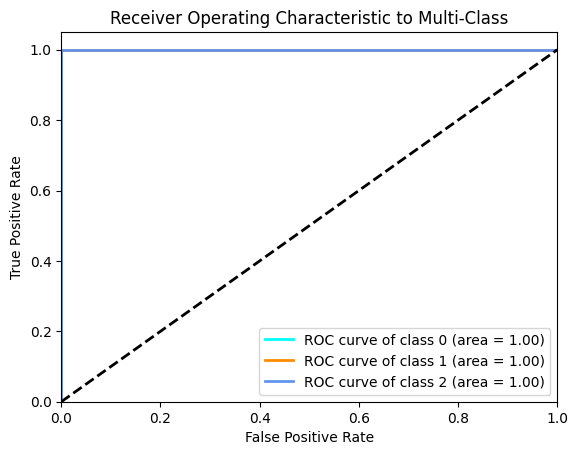

In [9]:
# Predict the target values using the trained models
y_pred_linear = svm_linear.predict(X_test)
y_pred_poly = svm_poly.predict(X_test)
y_pred_rbf = svm_rbf.predict(X_test)

# Print the classification reports
print("Linear SVM Classification Report:\n", classification_report(y_test, y_pred_linear))
print("Polynomial SVM Classification Report:\n", classification_report(y_test, y_pred_poly))
print("RBF SVM Classification Report:\n", classification_report(y_test, y_pred_rbf))

# Print the confusion matrices
print("Linear SVM Confusion Matrix:\n", confusion_matrix(y_test, y_pred_linear))
print("Polynomial SVM Confusion Matrix:\n", confusion_matrix(y_test, y_pred_poly))
print("RBF SVM Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rbf))


from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from itertools import cycle

# Binarize the output
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_bin.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], svm_linear.decision_function(X_test)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), svm_linear.decision_function(X_test).ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot all ROC curves
plt.figure()
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic to Multi-Class')
plt.legend(loc="lower right")
plt.show()

# Plot Confusion Matrix
Plot the confusion matrix to visualize the performance of the model.

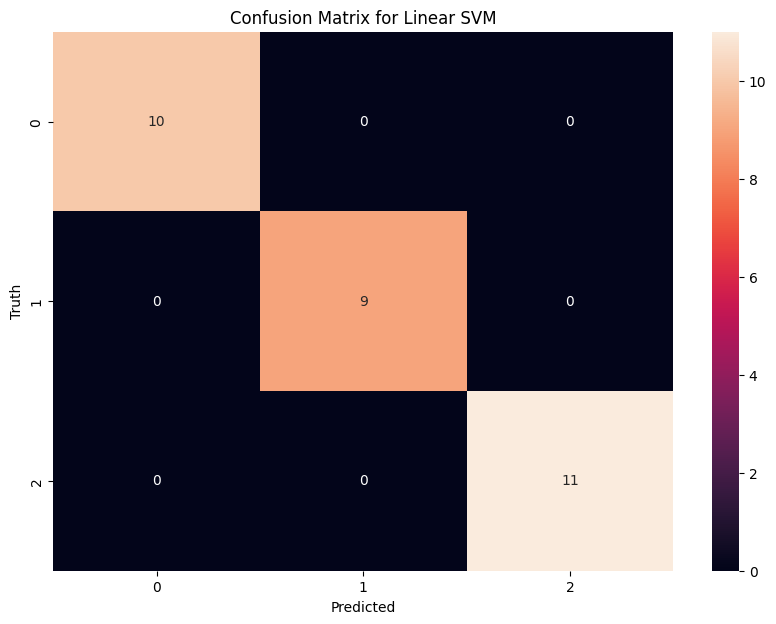

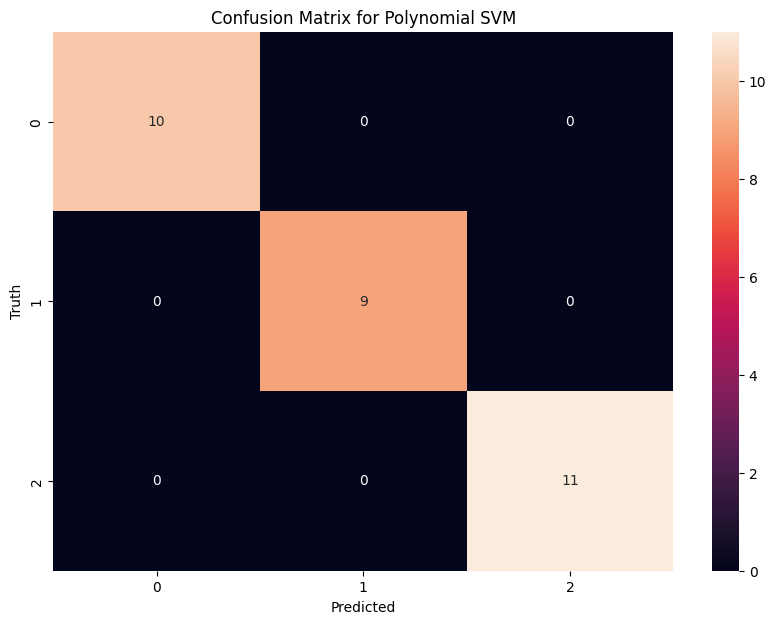

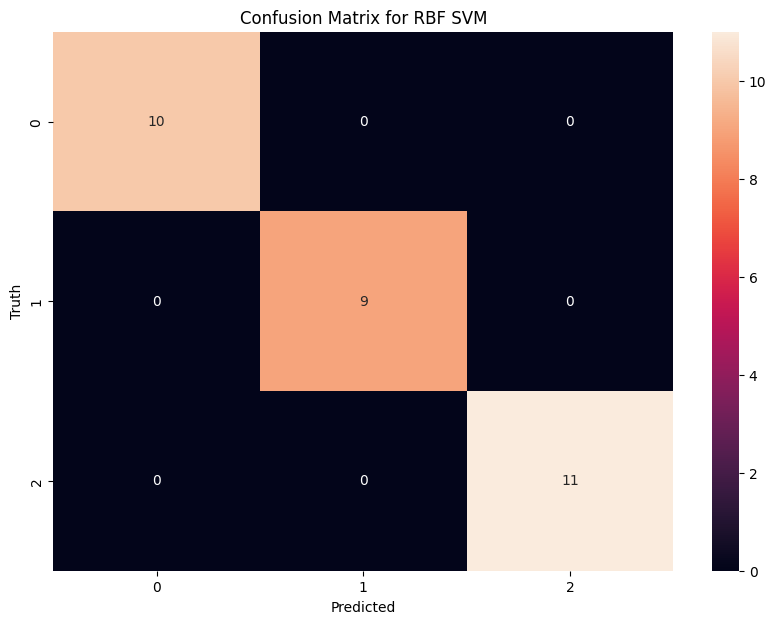

In [10]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define the models and model_names variables
models = [svm_linear, svm_poly, svm_rbf]
model_names = ['Linear SVM', 'Polynomial SVM', 'RBF SVM']

for model, name in zip(models, model_names):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    
    plt.figure(figsize=(10,7))
    sns.heatmap(cm, annot=True)
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Truth')
    plt.show()